# Bootstrapping

Lucas De Oliveira, Kooha Kwon, Melvin Vellera

In [3]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Quick Recap

Bootstrapping is a technique of **iterative resampling with replacement** to make inferences about the general population without conducting more experiments.

Say we ran an experiments with the following experimental results:

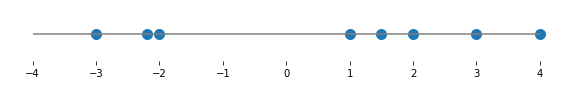

In [15]:
# Experimental sample
exp_sample = [-3, -2.2, -2, 1, 1.5, 2, 3, 4]

# Plot
fig, ax = plt.subplots(figsize = (10, 1))
ax.hlines(y = 0.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(exp_sample, [0]*len(exp_sample), s = 100)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Let's see what bootstrapped samples look like (re-run code cell to see variability of samples)...

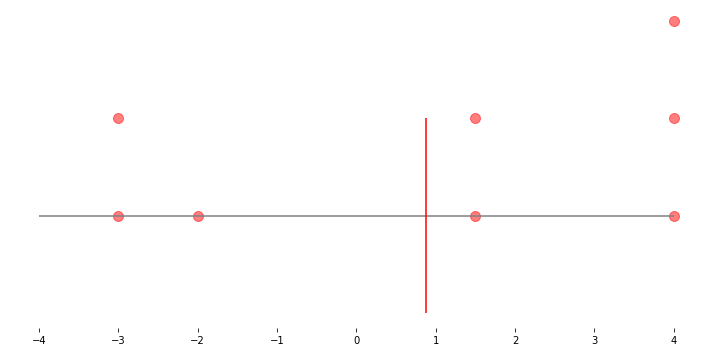

In [52]:
# Get two bootstrapped samples
inds = np.random.randint(0,8,8)
strap = [exp_sample[j] for j in inds]
val_count = Counter(strap)

bootstrap = []
counts = []
for val, count in val_count.items():
    k = 1
    while k <= count:
        bootstrap.append(val)
        counts.append(k)
        k += 1       


# Plot
fig, ax = plt.subplots(figsize = (10, 5))

ax.hlines(y = 1.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(bootstrap, counts, s = 100, color = 'red', alpha = .5)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.vlines(x = np.mean(bootstrap), ymin = 0.0, ymax = 2.0, color = 'red')

plt.tight_layout()
plt.show()

Finally, we can analyze the summary statistic(s) for our bootstrapped samples:

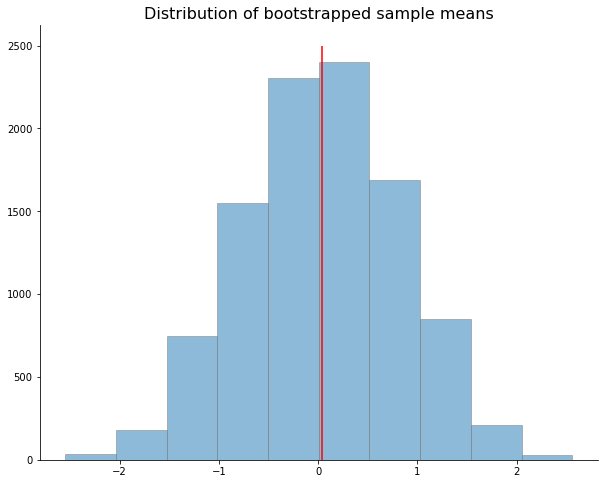

In [58]:
# Bootstrap 10,000 samples
means = []

for i in range(10_000):
    inds = np.random.randint(0,7,8)
    strap = [exp_sample[j] for j in inds]
    means.append(np.mean(strap))

# Plot
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(means, alpha = .5, edgecolor = 'grey')
ax.vlines(x = np.mean(means), ymin = 0, ymax = 2500, color = 'red')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Distribution of bootstrapped sample means', size = 16)

plt.show()

## Example with Real Data

**Description of example/data here** -- for now I have included BodyFatPercentage.csv

1. Take sample size 10 from one of the columns (we'll call the population)
2. Use traditional t-dist for confidence interval (too wide)
3. Bootstrap sample size 10 10,000x
4. Compare to population

In [14]:
# Load data
data = pd.read_csv('BodyFatPercentage.csv')
data.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Using sklearn

Instead of bootstrapping manually, we can use scikit-learn's resample() function...

In [27]:
from sklearn.utils import resample
a = [1, 2, 3, 4, 5, 6, 8, 9, 10]
b = resample(a, replace = True, n_samples = len(a), random_state = 1)
b

[6, 10, 6, 1, 1, 2, 9, 8, 3]

### Look at distribution of sample (population)

**We can consider using an entire column to represent the population and select a random sample from the column to play with. Then we can compare to "population" to see how distributions differ.**

### Bootstrap and calculate statistic

###

In [28]:
len(data)

252